#TITANIC SURVIVAL PREDICTION

In [145]:
import pandas as pd

In [146]:
data=pd.read_csv('Titanic-Dataset.csv')
data=data.drop(columns=['PassengerId','Name','Ticket','Cabin',])

print(data.head(5))
print('\n')
print(data.isna().sum())

data['Age']=data['Age'].fillna(data['Age'].median())
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Sex']=data['Sex'].map({'male':0,'female':1}) #male->0 #female->1

print('\n',data.head(10))

data=pd.get_dummies(data,columns=['Embarked'],drop_first=True)
print('\n',data.head(10))

print('\n')
print(data.isna().sum())
print('\n')
print(data.dtypes)

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

    Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    0  22.0      1      0   7.2500        S
1         1       1    1  38.0      1      0  71.2833        C
2         1       3    1  26.0      0      0   7.9250        S
3         1       1    1  35.0      1      0  53.1000        S
4         0       3    0  35.0      0      0   8.0500        S
5         0       3    0  28.0      0      0   8.4583        Q
6         0       

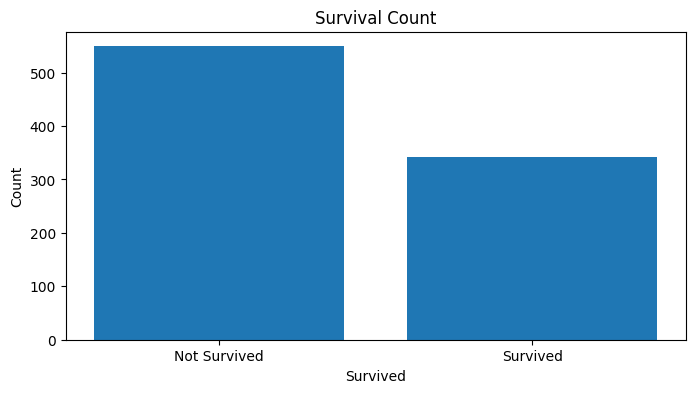

In [147]:
import matplotlib.pyplot as plt

survival_counts = data['Survived'].value_counts()
survival_counts
plt.figure(figsize=(8, 4))
plt.bar(survival_counts.index, survival_counts)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count')
plt.xticks(
    ticks=[0, 1],
    labels=['Not Survived', 'Survived']
)
plt.show()

In [148]:
X=data.drop(columns=['Survived'])
Y=data['Survived']

from sklearn.model_selection import train_test_split as ttsp
X_train, X_test, Y_train, Y_test = ttsp(
    X,Y,
    test_size=0.2,
    random_state=0
    )
from sklearn.linear_model import LogisticRegression as LR
model=LR(max_iter=1000)

model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

from sklearn.metrics import accuracy_score
acc_score=accuracy_score(Y_test,Y_pred)
print('Generated Accuray Score :' , acc_score)



Generated Accuray Score : 0.8156424581005587


In [149]:
features=X.columns
coefficients=model.coef_[0]
print(features)

importance=pd.DataFrame(
    {
        'Feature':features,
        'Importance':abs(coefficients)
    }
)
importance.sort_values(by='Importance',ascending=False,inplace=True)
print("\n",importance)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

       Feature  Importance
1         Sex    2.562986
0      Pclass    1.031414
3       SibSp    0.360184
7  Embarked_S    0.274836
6  Embarked_Q    0.156501
2         Age    0.042134
4       Parch    0.041814
5        Fare    0.001730


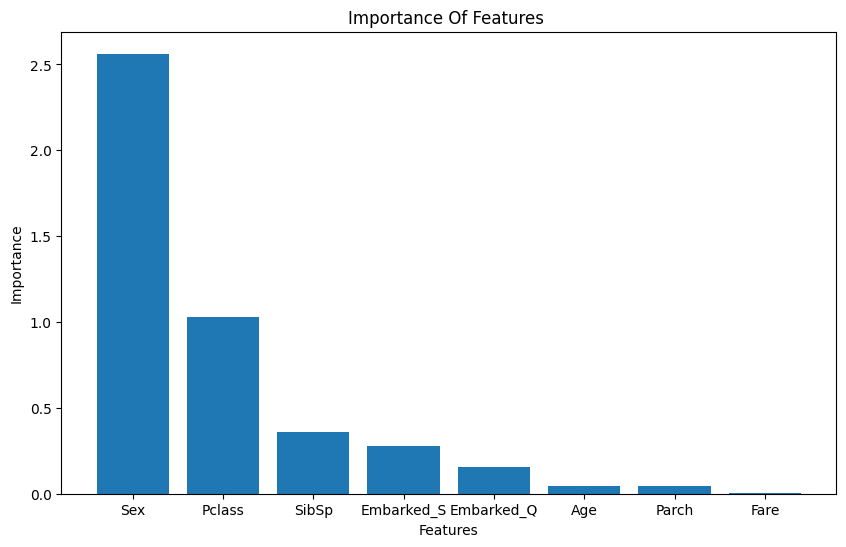

In [150]:
plt.figure(figsize=(10,6))
plt.bar(importance['Feature'],importance['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Importance Of Features ')
plt.show()

In [151]:
new_passenger = pd.DataFrame({
    'Pclass': [3],
    'Sex': [1],
    'Age': [25],
    'SibSp': [0],
    'Parch': [0],
    'Fare': [7.25],
    'Embarked_Q': [0],
    'Embarked_S': [1]
})
new_passenger=new_passenger[X.columns]
prediction = model.predict(new_passenger)
print("Prediction Based on New Passenger",prediction)

Prediction Based on New Passenger [1]
